# I. Réduction de dimensions et Visualisation des données

## 1.  imports du jeu de données

In [744]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [745]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

## 2. Analyse des composantes principales

In [746]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [747]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Variance par chaque composante  :")
print(pca.explained_variance_)
print("\nRatio de variance par chaque composante  :")
print(pca.explained_variance_ratio_)

print("\nComposantes ")
print(pca.components_)


Variance par chaque composante  :
[10.80999558  1.45184229  0.0581652   0.03279996  0.01406283  0.00621041
  0.00523837  0.00406512  0.00187861  0.00145726  0.0010361   0.00034505]

Ratio de variance par chaque composante  :
[0.87268193 0.11720602 0.00469563 0.00264791 0.00113528 0.00050136
 0.00042289 0.00032817 0.00015166 0.00011764 0.00008364 0.00002786]

Composantes 
[[ 0.27151028  0.28846164  0.3010811   0.30354174  0.28353089  0.27841907
   0.27290295  0.28757774  0.30472022  0.3038548   0.29242808  0.2729549 ]
 [ 0.39933494  0.29907184  0.12943051 -0.11530598 -0.32314291 -0.35846763
  -0.38879639 -0.3010133  -0.11231622  0.12249226  0.26269461  0.38693688]
 [ 0.04409365  0.03948181  0.53570204  0.5113345   0.23821244  0.05381216
  -0.22933643 -0.25421533 -0.27486626 -0.3536259  -0.25411937 -0.07756511]
 [-0.1558089   0.07307363  0.54015114 -0.07666717 -0.3189685  -0.30424435
  -0.06181967  0.16879935  0.35726159  0.2857622  -0.15061539 -0.46275418]
 [-0.2584192  -0.15926626 -0.1

Nombre de composantes pour expliquer 90% de la variance : 2


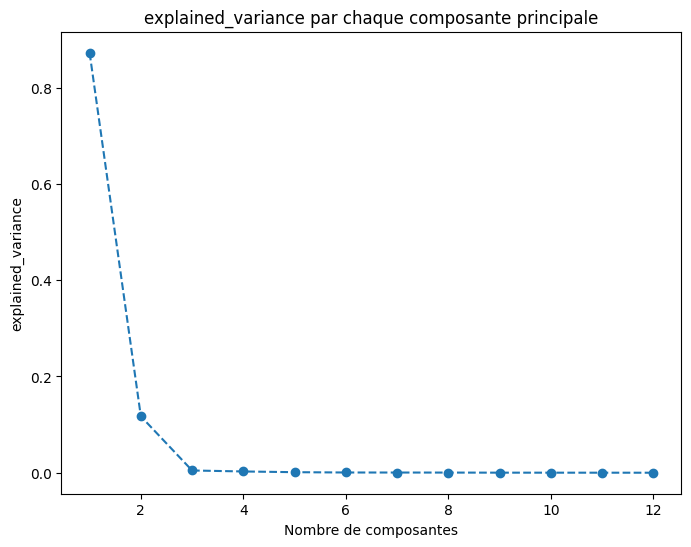

In [748]:


cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Nombre de composantes pour expliquer 90% de la variance : {n_components}")


plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('explained_variance par chaque composante principale')
plt.xlabel('Nombre de composantes')
plt.ylabel('explained_variance')
plt.show()


In [749]:
print(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])

0.9898879529268558


On remarque que les 2 premieres composantes expliquent plus de 90% de la variance avec presque 99%



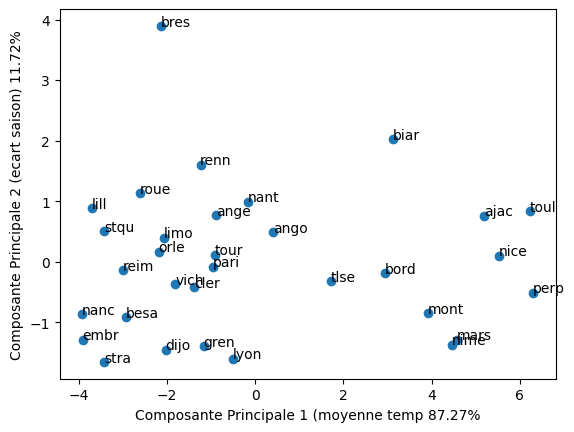

In [750]:


plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel(f'Composante Principale 1 (moyenne temp {pca.explained_variance_ratio_[0] * 100:.2f}%')
plt.ylabel(f'Composante Principale 2 (ecart saison) {pca.explained_variance_ratio_[1] * 100:.2f}%')
plt.show()


Le premier axe semble corréler avec toutes les températures, les villes ayant des coordonées positive ayant des températures plus élevées que la moyenne.

Le deuxieme axe semble corréler avec les température des saisons, les villes ayant des coordonées positive ayant des étés plus chaud et des hivers plus froid.

(petite incomprhension pour brest ? apres une recherche internet... le mois de janvier y semble effectivement doux)

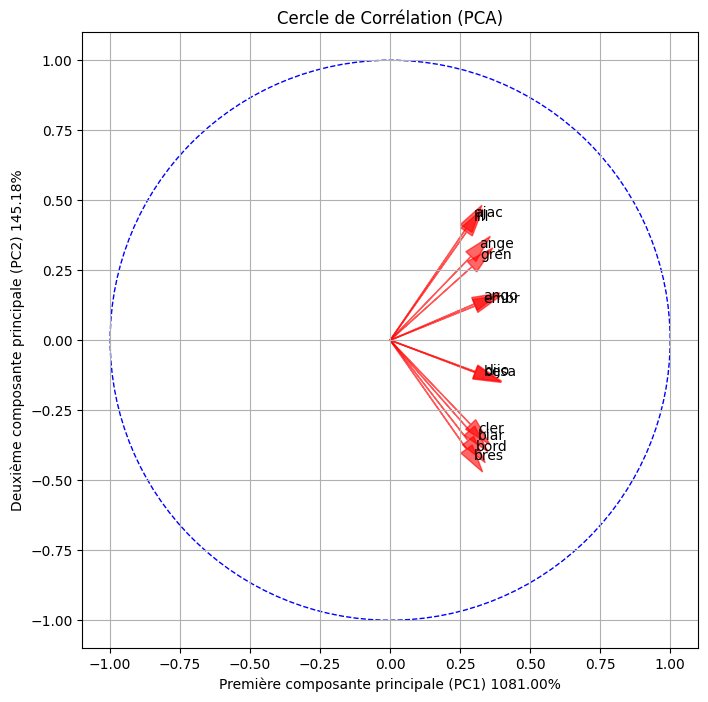

In [751]:
loadings = pca.components_.T
angles = np.arctan2(loadings[:, 1], loadings[:, 0])
plt.figure(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='b', fill=False, linestyle='--')
plt.gca().add_artist(circle)

for i in range(len(loadings)):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
              color='r', alpha=0.6, head_width=0.05, head_length=0.1)
    plt.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, labels[i], color='black')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title('Cercle de Corrélation (PCA)')
plt.xlabel(f'Première composante principale (PC1) {pca.explained_variance_[0]*100:.2f}%')
plt.ylabel(f'Deuxième composante principale (PC2) {pca.explained_variance_[1]*100:.2f}%')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()


## 3.  Réaliser une Analyse en Composantes Principales pour crimes.csv

Variance  par chaque composante principale :
[4.19893828 1.26400187 0.74062921 0.32288984 0.26323924 0.22657089
 0.12658781]

Ratio de variance  par chaque composante principale :
[0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]

Composantes principales (axes) :
[[ 0.30027916  0.43175936  0.39687549  0.3966517   0.44015721  0.35735953
   0.29517681]
 [ 0.62917444  0.16943512 -0.04224698  0.34352815 -0.20334059 -0.40231912
  -0.50242093]]
nb axes:  2  permetant 76.48116201908644 % de la variance


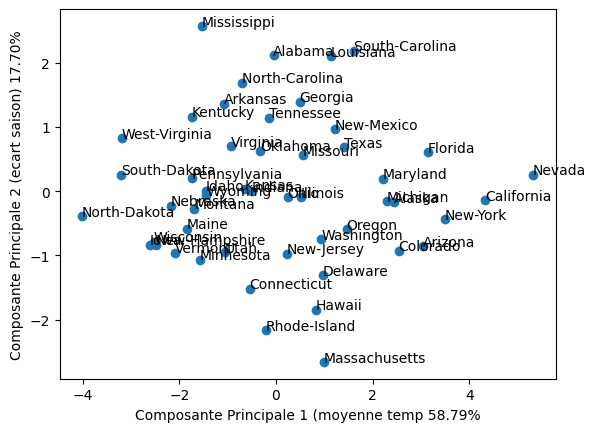

In [752]:
data = pd.read_csv('./crimes.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Variance  par chaque composante principale :")
print(pca.explained_variance_)
print("\nRatio de variance  par chaque composante principale :")
print(pca.explained_variance_ratio_)

print("\nComposantes principales (axes) :")
print(pca.components_[:2])

pourcentage_cumulatif = np.cumsum(pca.explained_variance_) / np.sum(pca.explained_variance_)
nombre_axes_necessaires = np.argmax(pourcentage_cumulatif >= 0.76) + 1
print("nb axes: ", nombre_axes_necessaires, f" permetant {(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) * 100} % de la variance")


plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel(f'Composante Principale 1 (moyenne temp {pca.explained_variance_ratio_[0] * 100:.2f}%')
plt.ylabel(f'Composante Principale 2 (ecart saison) {pca.explained_variance_ratio_[1] * 100:.2f}%')
plt.show()

Ratio de variance expliquée par chaque composant : [0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]
Variance totale expliquée par les deux premiers composants : 76.48%


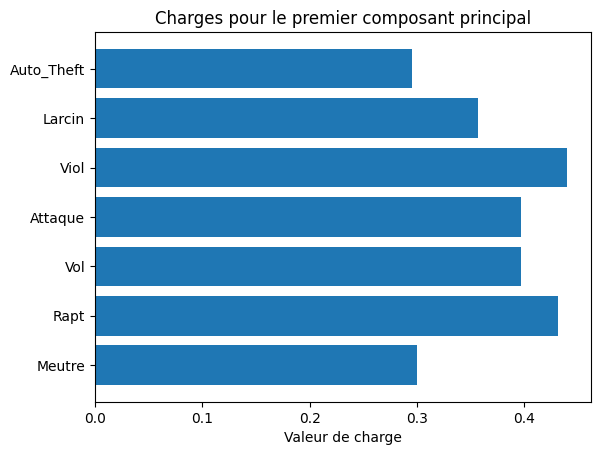

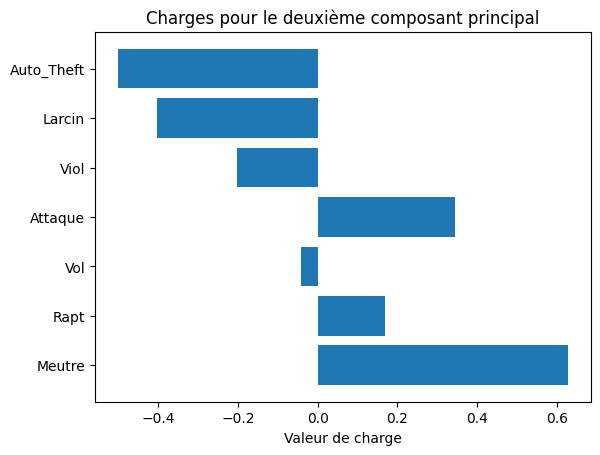

In [753]:

print(f"Ratio de variance expliquée par chaque composant : {pca.explained_variance_ratio_}")
print(f"Variance totale expliquée par les deux premiers composants : {sum(pca.explained_variance_ratio_[:2]) * 100:.2f}%")

loadings = pca.components_
feature_names = data.columns[1:]  

plt.barh(feature_names, loadings[0])
plt.title('Charges pour le premier composant principal')
plt.xlabel('Valeur de charge')
plt.show()

plt.barh(feature_names, loadings[1])
plt.title('Charges pour le deuxième composant principal')
plt.xlabel('Valeur de charge')
plt.show()



Il semble ici un peu plus compliquer d'analyser les composantes princpales.... Neanmoins l analyses des variables contribuants nous composantent :

pc1=le cumul des crimes
pc2=l'ecart entre l'appat du gain pour le crime ou juste l'appat de la violance

L'alabama semble plus dangereux que les autres etats...

## 4.  Réaliser une Analyse en Composantes Principales pour 50_Startups.csv


Variance expliquée par chaque composante principale :
[2.7267099  1.04019163 0.28830861 0.02642251]

Ratio de variance expliquée par chaque composante principale :
[0.66804393 0.25484695 0.07063561 0.00647351]

Composantes principales (axes) :
[[ 0.59347855  0.14737886  0.52064694  0.59580992]
 [ 0.04048087  0.95051314 -0.30797098 -0.00632069]]
nb axes:  2


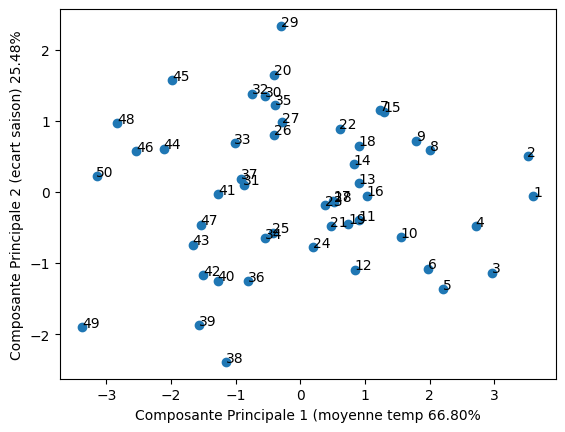

In [754]:
data = pd.read_csv('./50_Startups.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()

X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)
print("\nRatio de variance expliquée par chaque composante principale :")
print(explained_variance_ratio)

components = pca.components_
print("\nComposantes principales (axes) :")
print(components[:2])

pourcentage_cumulatif = np.cumsum(explained_variance) / np.sum(explained_variance)
nombre_axes_necessaires = np.argmax(pourcentage_cumulatif >= 0.90) + 1
print("nb axes: ", nombre_axes_necessaires)


plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel(f'Composante Principale 1 (moyenne temp {pca.explained_variance_ratio_[0] * 100:.2f}%')
plt.ylabel(f'Composante Principale 2 (ecart saison) {pca.explained_variance_ratio_[1] * 100:.2f}%')
plt.show()

Ratio de variance expliquée par chaque composant : [0.66804393 0.25484695 0.07063561 0.00647351]
Variance totale expliquée par les deux premiers composants : 92.29%


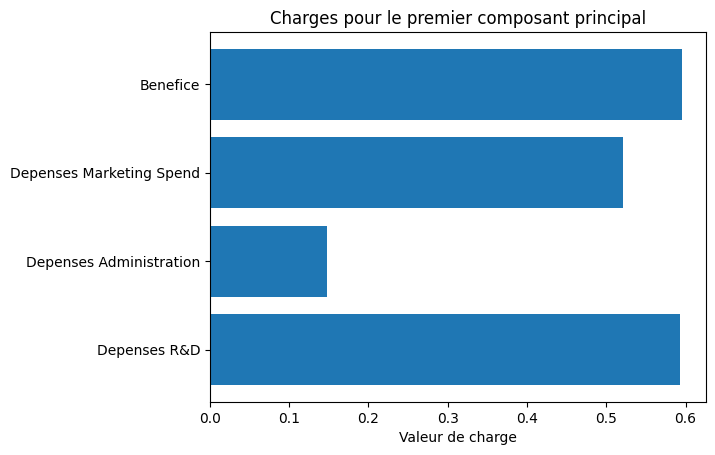

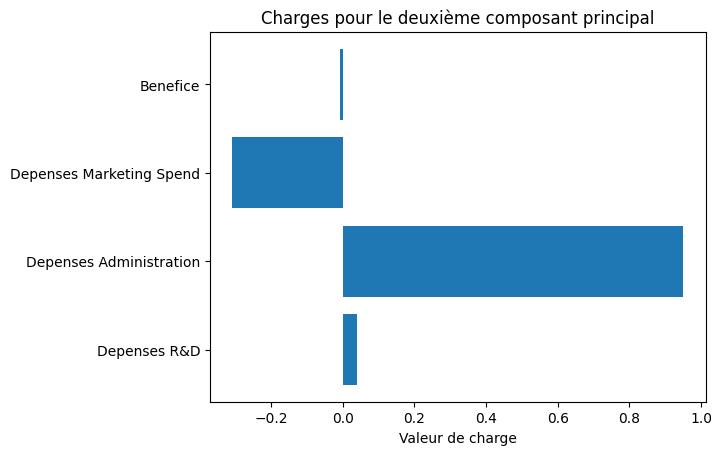

In [755]:

print(f"Ratio de variance expliquée par chaque composant : {pca.explained_variance_ratio_}")
print(f"Variance totale expliquée par les deux premiers composants : {sum(pca.explained_variance_ratio_[:2]) * 100:.2f}%")

loadings = pca.components_
feature_names = data.columns[1:]  

plt.barh(feature_names, loadings[0])
plt.title('Charges pour le premier composant principal')
plt.xlabel('Valeur de charge')
plt.show()

plt.barh(feature_names, loadings[1])
plt.title('Charges pour le deuxième composant principal')
plt.xlabel('Valeur de charge')
plt.show()


Idem. les premieres composantes sont :
        
pc1 = le cumul des statistiques
pc2 = ratio entre depense administratives (& R&D) et marketing (& benefice) 

## 5.  Réaliser une Analyse en Composantes Principales pour mammals.csv

Variance expliquée par chaque composante principale :
[4.88046969 2.24407727 1.28123625 0.65944291 0.4816746  0.26505957
 0.18272155 0.09360741 0.05096531 0.02467987]

Ratio de variance expliquée par chaque composante principale :
[0.48017524 0.22078825 0.12605711 0.06488067 0.04739057 0.02607844
 0.01797744 0.00920976 0.00501433 0.00242818]

Composantes principales (axes) :
[[ 0.59347855  0.14737886  0.52064694  0.59580992]
 [ 0.04048087  0.95051314 -0.30797098 -0.00632069]]
nb axes:  2


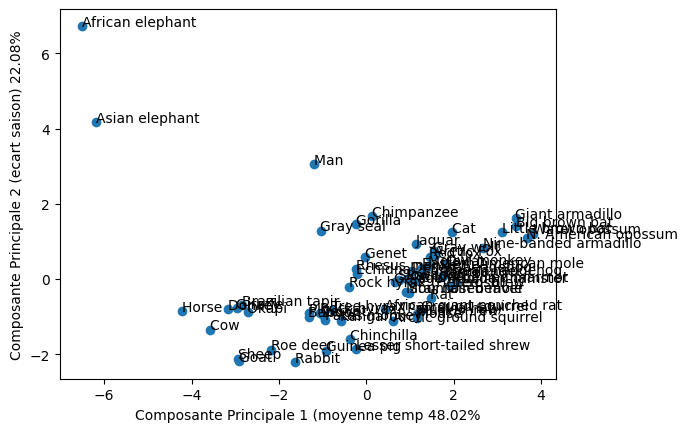

In [756]:
data = pd.read_csv('./mammals.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()

X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par chaque composante principale :")
print(explained_variance)

print("\nRatio de variance expliquée par chaque composante principale :")
print(explained_variance_ratio)

print("\nComposantes principales (axes) :")
print(components[:2])


pourcentage_cumulatif = np.cumsum(explained_variance) / np.sum(explained_variance)
nombre_axes_necessaires = np.argmax(pourcentage_cumulatif >= 0.70) + 1
print("nb axes: ", nombre_axes_necessaires)


plt.scatter(X_pca[:, 0], X_pca[:, 1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.xlabel(f'Composante Principale 1 (moyenne temp {pca.explained_variance_ratio_[0] * 100:.2f}%')
plt.ylabel(f'Composante Principale 2 (ecart saison) {pca.explained_variance_ratio_[1] * 100:.2f}%')
plt.show()

Ici pour expliquer 70% de la variance il suffit de deux composantes... 
La premiere semble etre le cumul des statistiques... La deuxieme ??

Ratio de variance expliquée par chaque composant : [0.48017524 0.22078825 0.12605711 0.06488067 0.04739057 0.02607844
 0.01797744 0.00920976 0.00501433 0.00242818]
Variance totale expliquée par les deux premiers composants : 70.10%


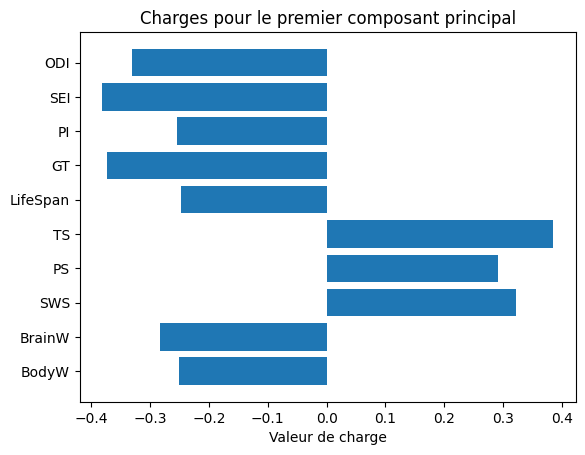

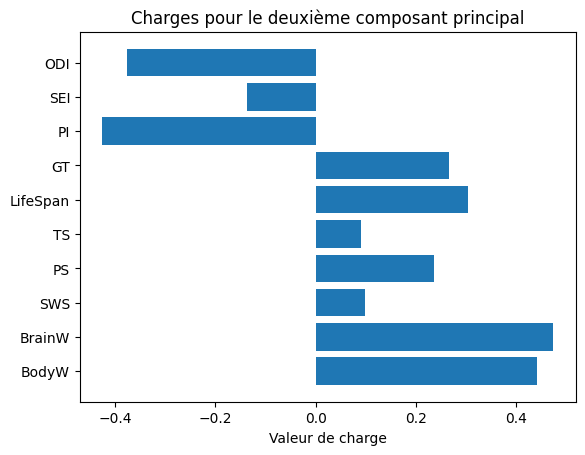

In [757]:

print(f"Ratio de variance expliquée par chaque composant : {pca.explained_variance_ratio_}")
print(f"Variance totale expliquée par les deux premiers composants : {sum(pca.explained_variance_ratio_[:2]) * 100:.2f}%")

loadings = pca.components_
feature_names = data.columns[1:]  

plt.barh(feature_names, loadings[0])
plt.title('Charges pour le premier composant principal')
plt.xlabel('Valeur de charge')
plt.show()

plt.barh(feature_names, loadings[1])
plt.title('Charges pour le deuxième composant principal')
plt.xlabel('Valeur de charge')
plt.show()


PC1 semble regrouper les traits morphologiques et biologiques (comme la taille du corps et la longévité), tandis que PC2 semble regrouper des facteurs écologiques et comportementaux, tels que l'exposition au danger ou la vulnérabilité à la prédation.

# II. Clustering

## 1. Application de la procedure KMeans afin dóbtenir les trois clusters


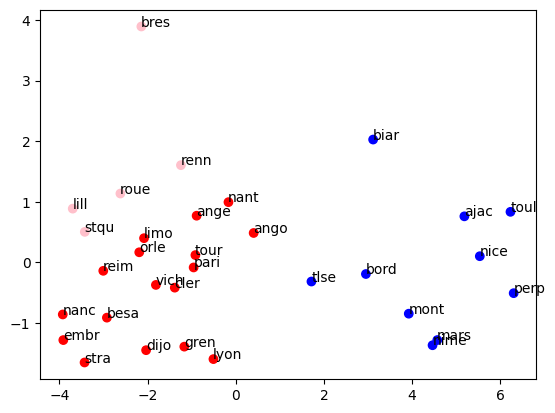

In [758]:
data = pd.read_csv('./villes.csv', sep=';')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)


from sklearn.cluster import KMeans
import matplotlib.colors as plt_colors

kmeans = KMeans(n_clusters=3, random_state=1)
clustering = kmeans.fit_predict(X_pca)

colors = ['red','yellow','blue','pink']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=plt_colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()


On remarque trois clusters :

- les villes du sud en bleu (toulouse, biartiz etc.)
- les villes ocaniques en rose (brest, rouen etc.)
- les villes continentales en rouge

## 2. Application de la procedure AgglomerativeClustering et comparaison des différentes méthodes d’agrégation

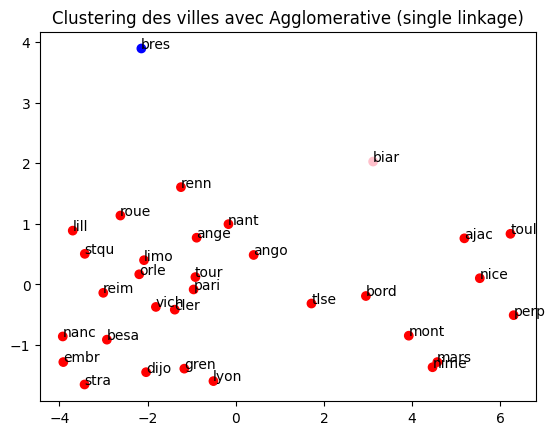

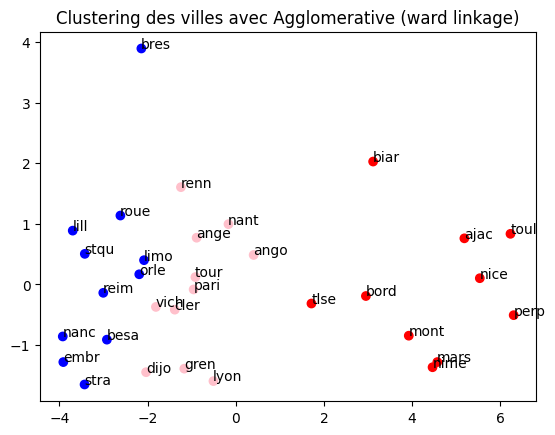

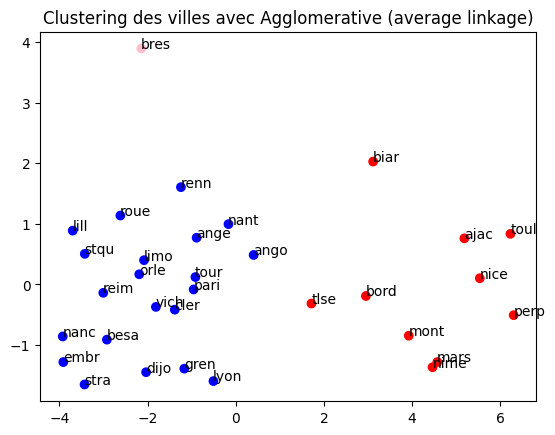

In [759]:
from sklearn.cluster import AgglomerativeClustering

methods = ['single', 'ward', 'average']

for method in methods:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    cluster_labels = clustering.fit_predict(X_pca)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap=plt_colors.ListedColormap(colors))
    for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.title(f'Clustering des villes avec Agglomerative ({method} linkage)')
    plt.show()


## 3. Deduction de la meilleure partition

In [760]:
from sklearn import metrics
import numpy as np

silhouette_scores = []
for i in np.arange(2, 10): 
    clustering = KMeans(n_clusters=i).fit_predict(X)
    score = metrics.silhouette_score(X, clustering, metric='euclidean')
    silhouette_scores.append(score)
    print(f"Nombre de clusters = {i}, Silhouette Score = {score}")

Nombre de clusters = 2, Silhouette Score = 0.6181156437258204
Nombre de clusters = 3, Silhouette Score = 0.3997417097231579
Nombre de clusters = 4, Silhouette Score = 0.32116963360685136
Nombre de clusters = 5, Silhouette Score = 0.35621760997186613
Nombre de clusters = 6, Silhouette Score = 0.2602523755829179
Nombre de clusters = 7, Silhouette Score = 0.29413518855176757
Nombre de clusters = 8, Silhouette Score = 0.3386091644368586
Nombre de clusters = 9, Silhouette Score = 0.4071115201359237


## 4. Resultat obtenu

la meilleure partition semble donc etre celle avec 2 clusters

## 5. Fonction pour determiner le meilleurs algorithme et la taille la plus optimale pour faire le cluster

In [761]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics

def compare_clustering_methods(X, n_clusters=3):
    best_score = -1
    best_method = None
    best_clustering = None
    
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_clustering = kmeans.fit_predict(X)
    kmeans_score = metrics.silhouette_score(X, kmeans_clustering)
    if kmeans_score > best_score:
        best_score = kmeans_score
        best_method = 'KMeans'
        best_clustering = kmeans_clustering
    
    agglom_single = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    agglom_single_clustering = agglom_single.fit_predict(X)
    agglom_single_score = metrics.silhouette_score(X, agglom_single_clustering)
    if agglom_single_score > best_score:
        best_score = agglom_single_score
        best_method = 'Agglomerative - Single'
        best_clustering = agglom_single_clustering
    
    agglom_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    agglom_ward_clustering = agglom_ward.fit_predict(X)
    agglom_ward_score = metrics.silhouette_score(X, agglom_ward_clustering)
    if agglom_ward_score > best_score:
        best_score = agglom_ward_score
        best_method = 'Agglomerative - Ward'
        best_clustering = agglom_ward_clustering
    
    agglom_avg = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    agglom_avg_clustering = agglom_avg.fit_predict(X)
    agglom_avg_score = metrics.silhouette_score(X, agglom_avg_clustering)
    if agglom_avg_score > best_score:
        best_score = agglom_avg_score
        best_method = 'Agglomerative - Average'
        best_clustering = agglom_avg_clustering
    
    return best_method, best_score, best_clustering

best_method, best_score, best_clustering = compare_clustering_methods(X)
print(f"Meilleure méthode: {best_method}, Score silhouette: {best_score}")





Meilleure méthode: Agglomerative - Average, Score silhouette: 0.4917281366704161


## 6. Fonction sur segmentation_data.csv

In [762]:
data = pd.read_csv('./segmentation_data.csv', sep=',')
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_method, best_score, best_clustering = compare_clustering_methods(X)
print(f"Meilleure méthode: {best_method}, Score silhouette: {best_score}")

Meilleure méthode: Agglomerative - Single, Score silhouette: 0.7275718052271952
